# data info

In [1]:
from biollm.evaluate.bm_metrices_gears import load_data, calculate_metrices_gears
from biollm.repo.gears import GEARS
import pickle
import pandas as pd

def load_model(model_path, device):
    model = GEARS(pert_data, device=device)
    model.model_initialize(pretrain_emb_type='universal')
    model.load_pretrained(model_path)
    return model

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/lightning/fabric/plugins/environments/xla.py:18: DeprecationWarning: `ModuleAvailableCache` is a special case of `RequirementCache`. Please use `RequirementCache(module=...)` instead.
  from lightning.fabric.accelerators.tpu import _XLA_AVAILABLE, TPUAccelerator
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/lightning/fabric/__init__.py:36: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning.fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pkg_resources/__init__.py:2348: DeprecationWarning: Deprecated call 

In [7]:
data_path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/data/finetune/gears_data/'
data_name = 'norman'

pert_data = load_data(data_path + '/norman_gears/', data_name)

Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:43
combo_seen2:19
unseen_single:36
Done!
Creating dataloaders....
Done!


here1


In [4]:
model_result = ['gears', 'mamba', 'sc_foundation']
model_path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/data/finetune/gears_data/model/'
output_path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/data/finetune/gears_data/evaluate/norman/'
# models = {}
# for i in model_result:
#     if i not in models:
#         tmp = model_path + '{}/'.format(i)
#         print(tmp)
#         mdl = load_model(tmp, 'cuda:0')
#         mdl.model.pretrain_emb_type='universal'
#         print(mdl.model.pretrain_emb_type)
#         models[i] = mdl
#         calculate_metrices_gears(pert_data, mdl, output_path + '{}.pk'.format(i))

In [5]:
plt_res_dict = {}
for i in model_result:
    with open(output_path + f'/{i}.pk'.format(i), 'rb') as f:
        [res,metrics,pert_res] = pickle.load(f)
    plt_res_dict[i] = [res,metrics,pert_res]


In [8]:

def make_pert_res_df(plt_res_dict, pert_data):
    dfs = []
    for i in plt_res_dict:
        df = pd.DataFrame(plt_res_dict[i][2])
        df['type']=df.index
        df = df.melt(id_vars='type')
        df['model'] = i
        dfs.append(df)
    pltdf = pd.concat(dfs)
    pltdf['ptype']='Unknown'
    pltdf['testtype']='Unknown'
    for name, pert_list in pert_data.subgroup['test_subgroup'].items():
        for pert in pert_list:
            pltdf.loc[pltdf.variable==pert,'testtype']=name
    return pltdf

pltdf = make_pert_res_df(plt_res_dict, pert_data)

In [14]:
plt_res_dict['gears'][1]

{'mse': 0.0044107744,
 'mse_de': 0.18672837,
 'pearson': 0.9875133078035729,
 'pearson_de': 0.8698074006447151}

In [17]:
plt_res_dict['mamba'][1]

{'mse': 0.0036632484,
 'mse_de': 0.123234704,
 'pearson': 0.9899160913680117,
 'pearson_de': 0.8828796705261384}

In [18]:
plt_res_dict['sc_foundation'][1]

{'mse': 0.004010057,
 'mse_de': 0.13691656,
 'pearson': 0.9884478822828835,
 'pearson_de': 0.8751814793991654}

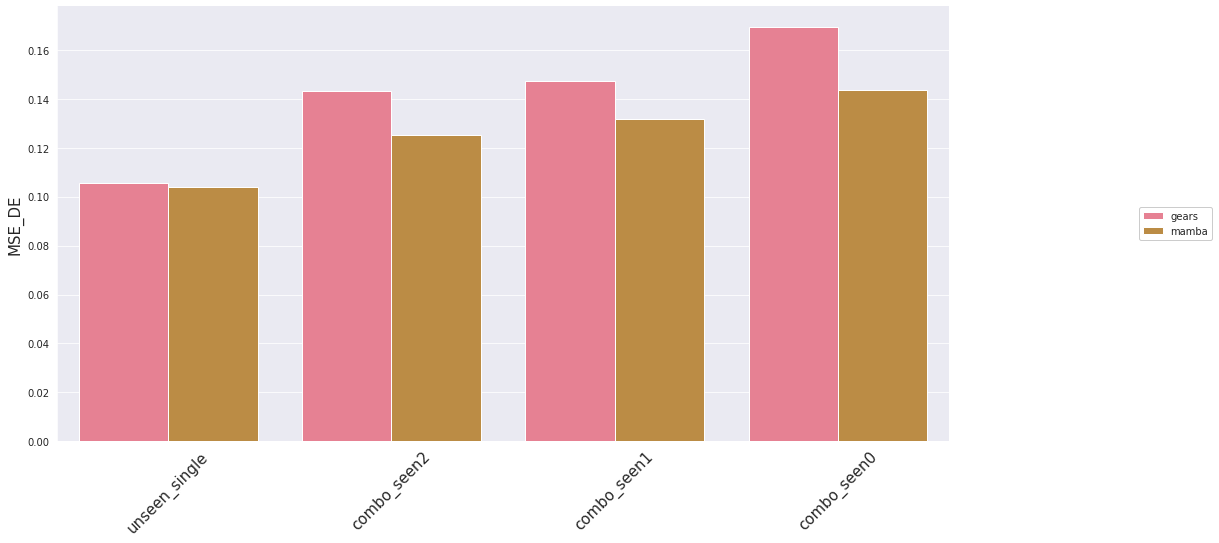

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set_palette(sns.color_palette("husl", 8))

plots_model = ['gears', 'mamba', 'sc_foundation']
tmpdf = pltdf[pltdf.model.isin(plots_model)]
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
plt.figure(figsize=(16, 8))
sns.barplot(tmpdf[tmpdf.type=='mse_de'],y='value',x='testtype',hue='model',errorbar=None,order=['unseen_single', 'combo_seen2', 'combo_seen1', 'combo_seen0'])
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('MSE_DE',fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel(None)
plt.legend(loc='center right',bbox_to_anchor=(1.3, 0.5),facecolor='white', framealpha=1)

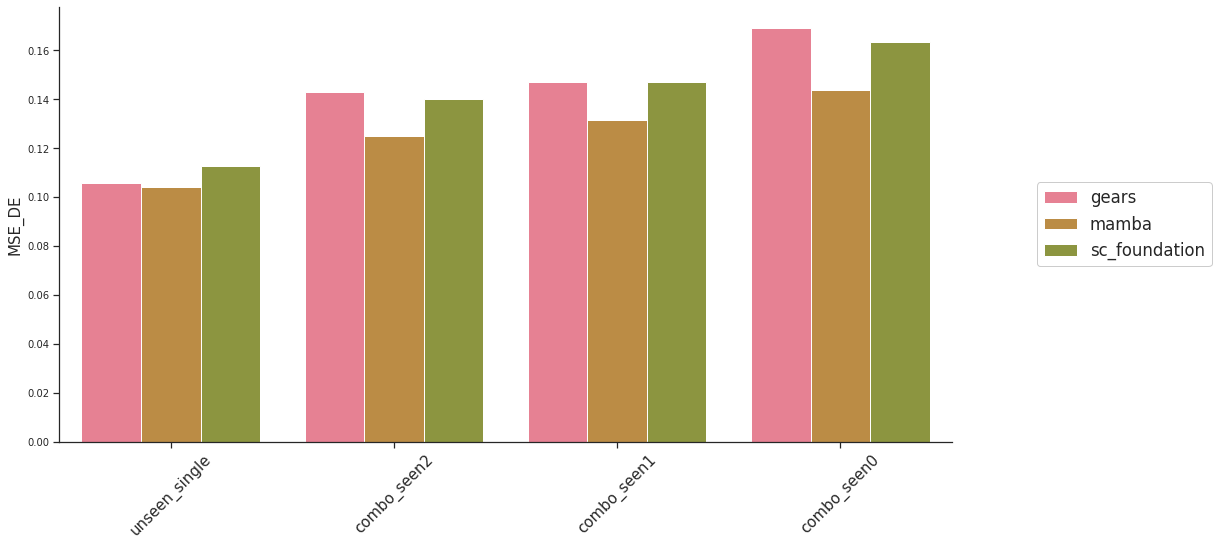

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set_palette(sns.color_palette("husl", 8))

plots_model = ['gears', 'mamba', 'sc_foundation']
tmpdf = pltdf[pltdf.model.isin(plots_model)]
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
plt.figure(figsize=(16, 8))
sns.barplot(tmpdf[tmpdf.type=='mse_de'],y='value',x='testtype',hue='model',errorbar=None,order=['unseen_single', 'combo_seen2', 'combo_seen1', 'combo_seen0'])
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('MSE_DE',fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel(None)
plt.legend(loc='center right',bbox_to_anchor=(1.3, 0.5),facecolor='white', framealpha=1)

# Case

In [30]:
import numpy as np



def make_plot_box_pert_data(query, pert_data, plt_res_dict):
    adata = pert_data.adata
    gene2idx = pert_data.node_map
    cond2name = dict(adata.obs[['condition', 'condition_name']].values)
    gene_raw2id = dict(zip(adata.var.index.values, adata.var.gene_name.values))
    de_idx = [gene2idx[gene_raw2id[i]] for i in adata.uns['top_non_dropout_de_20'][cond2name[query]]]
    genes = [gene_raw2id[i] for i in adata.uns['top_non_dropout_de_20'][cond2name[query]]]
    truth = adata[adata.obs.condition == query].X.toarray()[:, de_idx]
    ctrl_means = adata[adata.obs['condition'] == 'ctrl'].to_df().mean()[de_idx].values
    dfs = []
    for i in plt_res_dict:
        p_idx = np.where(plt_res_dict[i][0]['pert_cat'] == query)[0]
        df=pd.DataFrame(plt_res_dict[i][0]['pred'][p_idx][:,de_idx],columns=genes)
        df = df - ctrl_means
        df = df.melt()
        df['model'] = i
        dfs.append(df)
    df = pd.DataFrame(truth,columns=genes).melt()
    df['model']='GT'
    dfs.append(df)
    pltdf = pd.concat(dfs)
    return pltdf


In [39]:
np.unique(pltdf[pltdf['testtype'] == 'combo_seen0']['variable'])

array(['BCL2L11+TGFBR2', 'BPGM+ZBTB1', 'CBL+CNN1', 'CBL+PTPN9',
       'CBL+TGFBR2', 'CEBPB+MAPK1', 'CNN1+MAPK1', 'DUSP9+IGDCC3',
       'DUSP9+MAPK1', 'DUSP9+SNAI1', 'FOSB+CEBPB', 'IGDCC3+MAPK1',
       'MAPK1+TGFBR2', 'TGFBR2+IGDCC3', 'ZC3HAV1+HOXC13'], dtype=object)

BCL2L11+TGFBR2
BPGM+ZBTB1
CBL+CNN1
CBL+PTPN9
CBL+TGFBR2
CEBPB+MAPK1
CNN1+MAPK1
DUSP9+IGDCC3
DUSP9+MAPK1
DUSP9+SNAI1
FOSB+CEBPB
IGDCC3+MAPK1
MAPK1+TGFBR2
TGFBR2+IGDCC3
ZC3HAV1+HOXC13


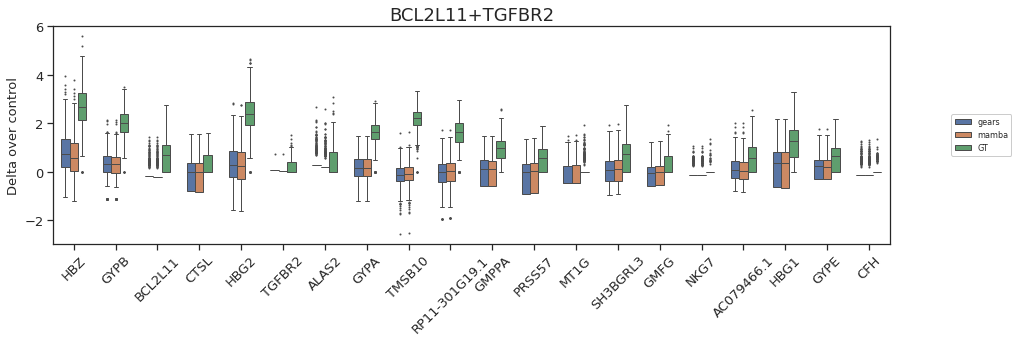

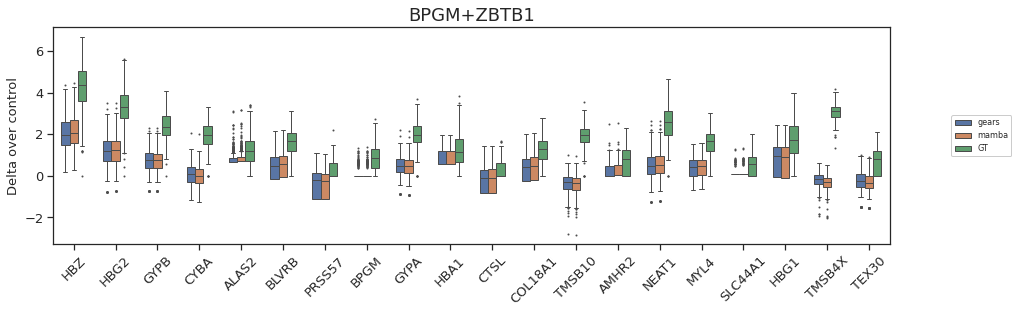

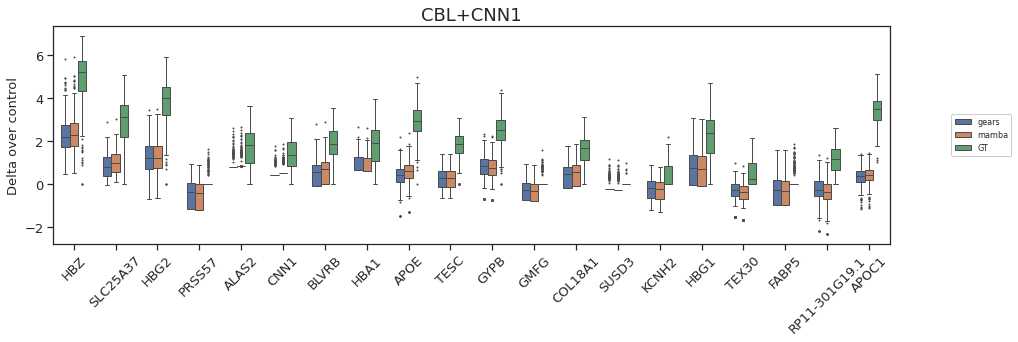

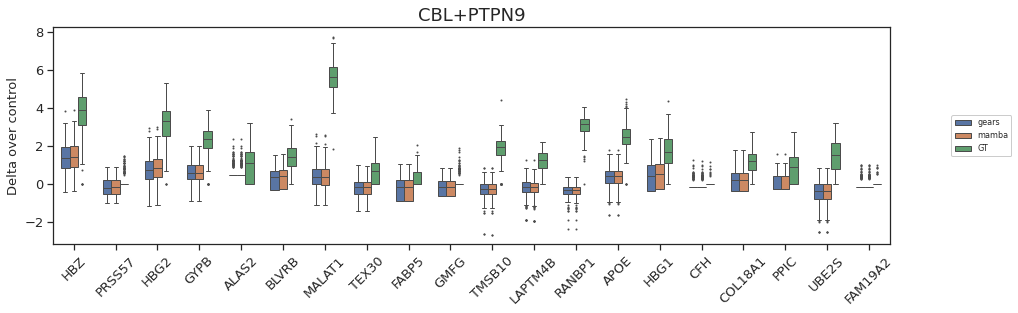

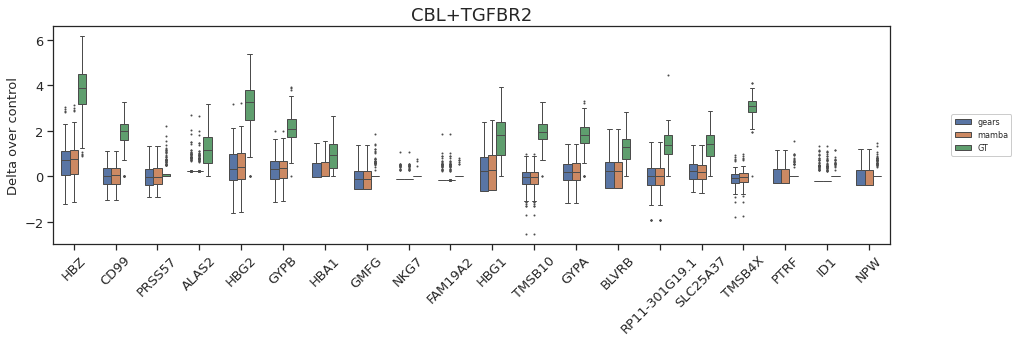

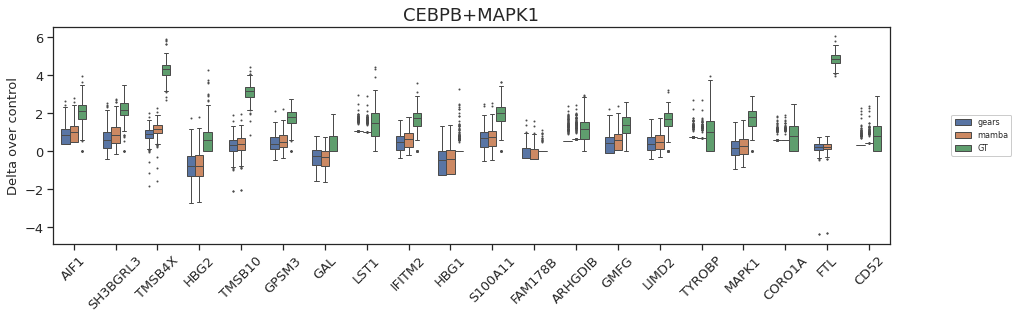

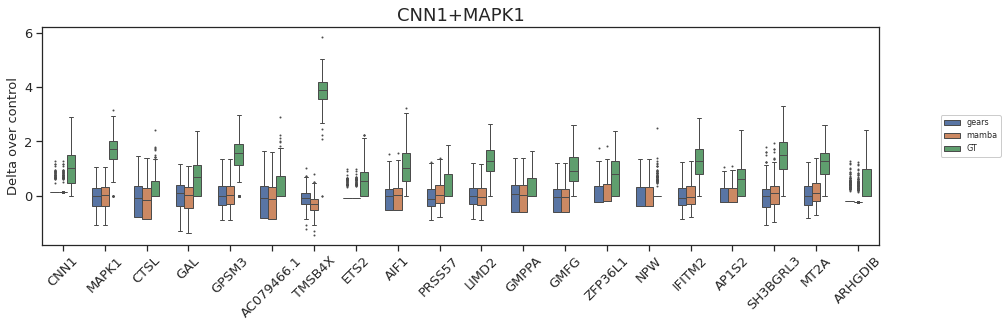

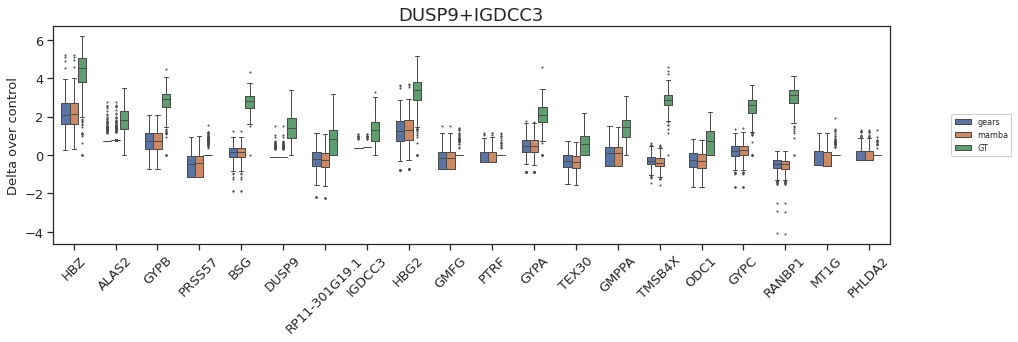

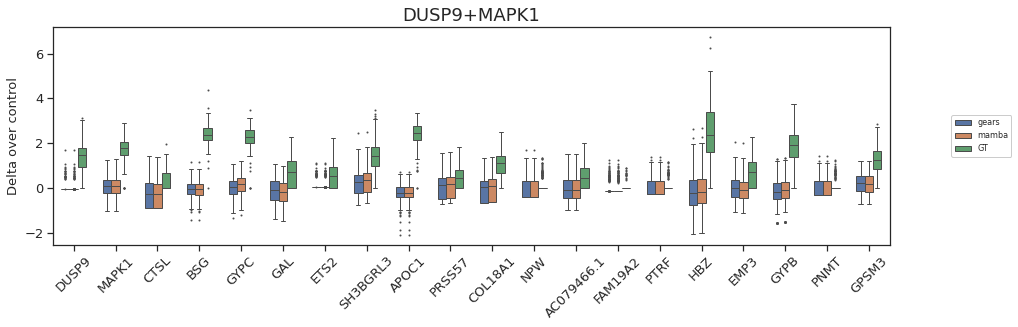

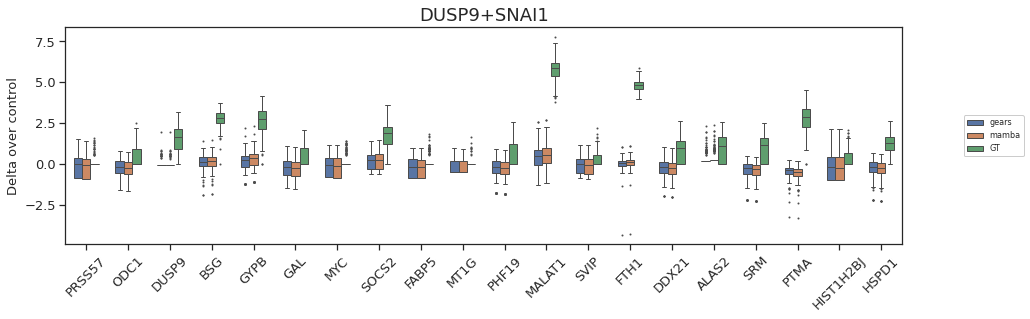

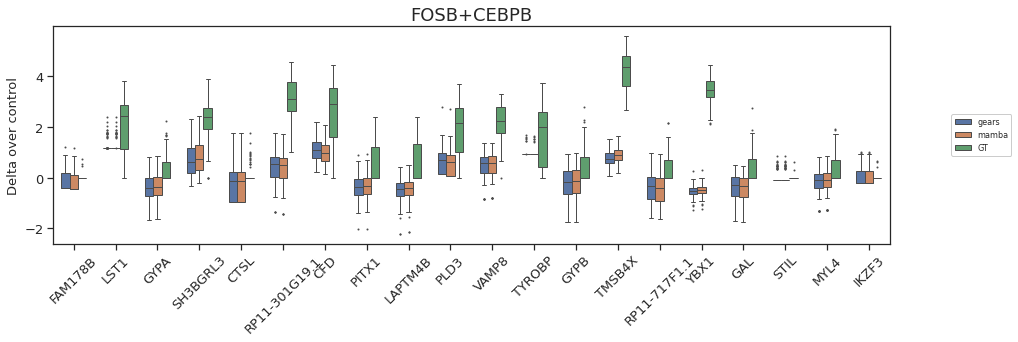

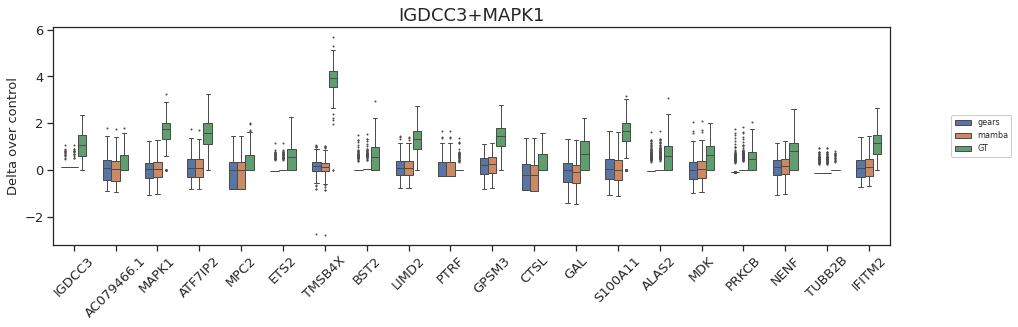

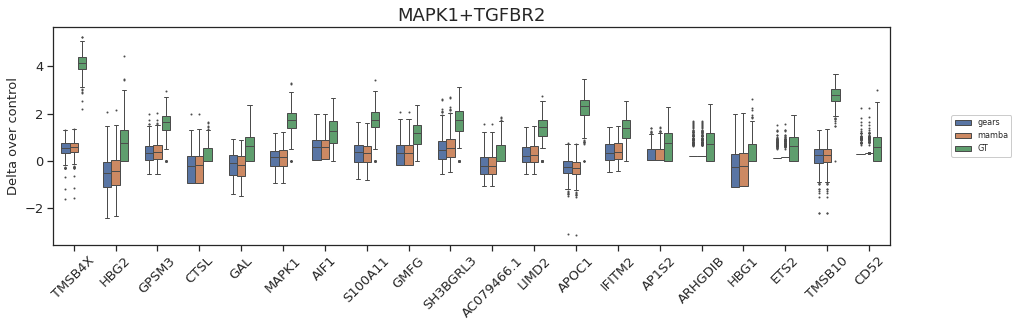

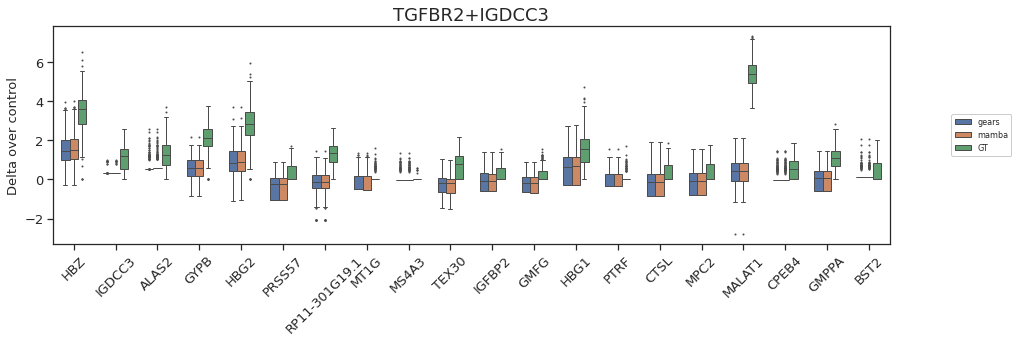

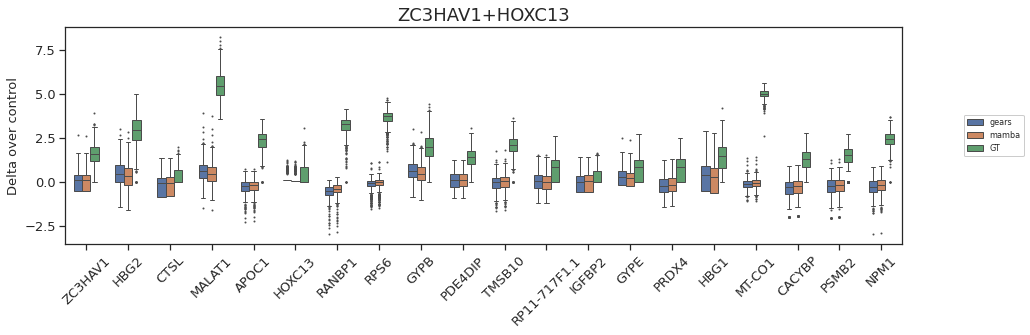

In [40]:
for query in np.unique(pltdf[pltdf['testtype'] == 'combo_seen0']['variable']):
    print(query)
    # query = 'ETS2+CEBPE'
    pltdf_box = make_plot_box_pert_data(query, pert_data, plt_res_dict)
    plt.figure(figsize = (15,4))
    sns.boxplot(data=pltdf_box,x='variable',y='value',hue='model',hue_order=['gears','mamba','GT',],fliersize=1,width=0.6)
    plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5),facecolor='white', framealpha=1,fontsize=8);
    plt.xticks(rotation=45,fontsize=13);
    plt.ylabel('Delta over control',fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(None)
    plt.title(query)

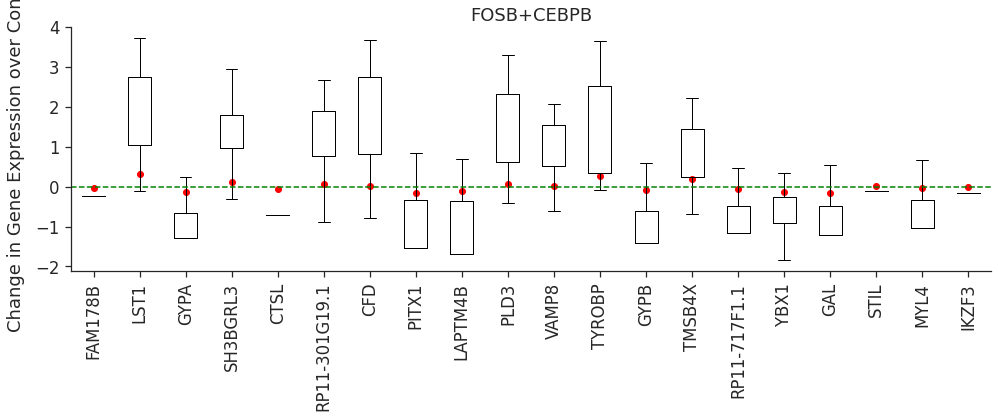

In [75]:
model1 = load_model(data_path + '/norman/', 'cuda:0')
model1.plot_perturbation('FOSB+CEBPB')